# Problem 2

Distance from the line to arbitrary vector x 

$$h = \frac{g(x)}{\lVert \omega \rVert}$$

$$\begin{align*}
f(x_1, x_2) &= 2x_1 + 3x_2 + 1 = 0\\
f(\vec x) &= \begin{bmatrix}2& 3\end{bmatrix} \begin{bmatrix}x_1\\ x_2\end{bmatrix} + 1 = \omega^Tx + 1 = 0 \\
\end{align*}$$

$$\begin{align*}
h_a &= \frac{g(x_a)}{\lVert \omega \rVert} = \frac{(4+3+1)}{\sqrt{13}} \frac{8}{\sqrt{13}}\\
h_b &= \frac{g(x_b)}{\lVert \omega \rVert} = \frac{2-3+1}{\sqrt{13}} = 0
\end{align*}$$

# Problem 3

If $X$ is on the linf of $\omega^TX + \omega_0 = 0$, the objective function can be interpreted as the shortest distance $r^{*}$ from origin to the line. We geometrically (or intuitively) know that distance $r$ will be minimal when vector $X$ is orthogonal to the line

<img src="./image_files/sol01.png", width = 350>
<br>

$$r^{*} = -\frac{\omega_0}{\lVert \omega \rVert} \text{and} \vec X^* = -\frac{\omega_0}{\lVert \omega \rVert}\frac{\vec \omega}{\lVert \omega \rVert} = \frac{\omega_0}{\omega^T\omega}\vec \omega$$

# Problem 4

$$\begin{align*}
\sigma(z) &= \frac{1}{1+e^{-x}}\\
\frac{d\sigma(z) }{dx} &= \frac{(1 + e^{-x})0 - 1(-e^{-x})}{(1 + e^{-1})^2}
&= \frac{e^{-x}}{(1+e^{-x})^2}\\
\end{align*}$$


note
$$\begin{align*}
1 - \sigma(z) &= \frac{1+e^{-x}-1}{1+e^{-x}}
&= \frac{e^{-x}}{1+e^{-x}}
\end{align*}$$

hence

$$\frac{d\sigma(z)}{dx} = (1-\sigma(z)) \sigma(z) $$

# Problem 5

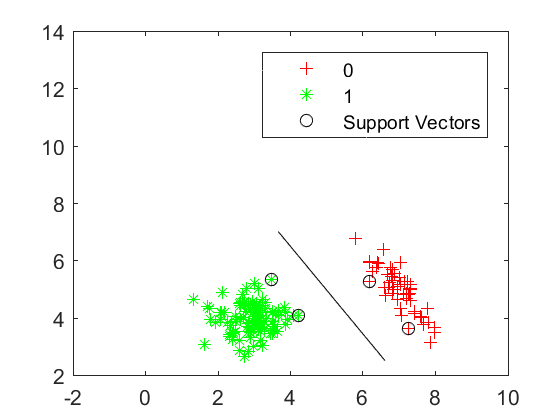

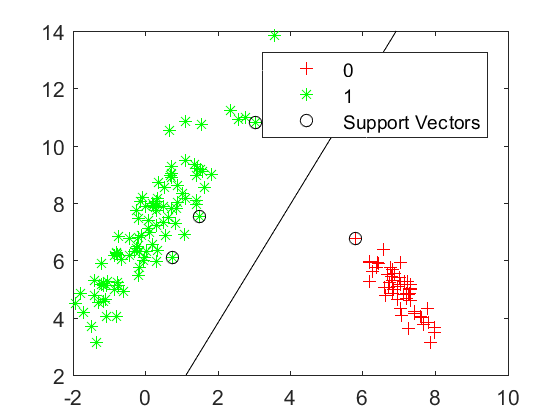

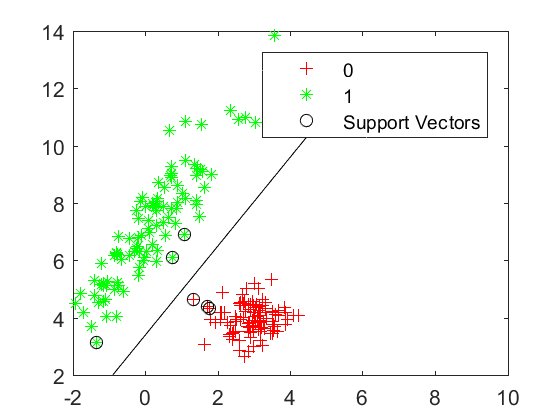

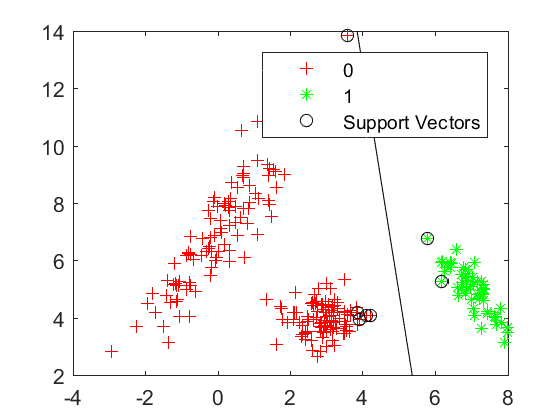

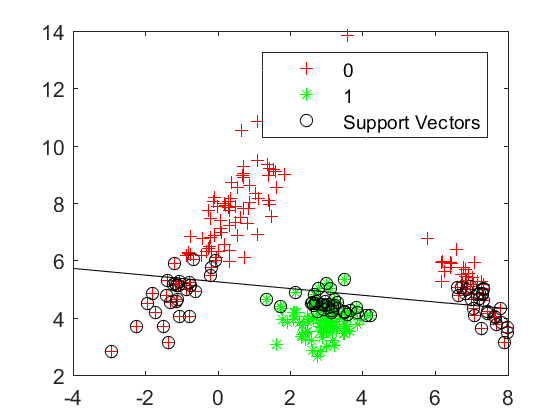

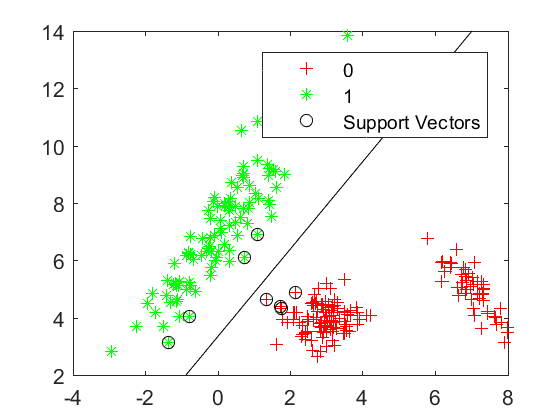

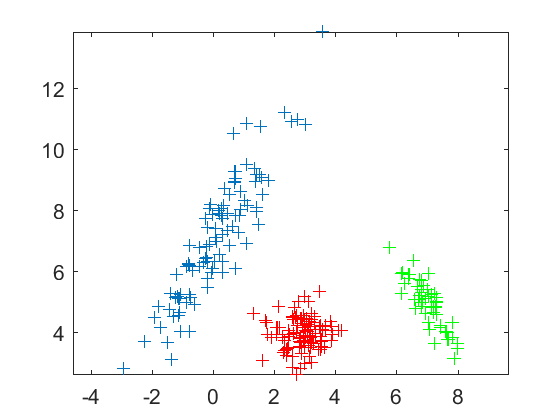

C =

     1     1     0


C4 =

     1


In [1]:
%% generate two simulated clusters

clear all
close all
clc

mu1 = [0 7];
SIGMA1 = [1 1.5; 1.5 3];
X1 = mvnrnd(mu1,SIGMA1,100);

mu2 = [3 4];
SIGMA2 = 0.3*[1 0; 0 1];
X2 = mvnrnd(mu2,SIGMA2,100);

mu3 = [7 5];
SIGMA3 = 0.3*[1 -1;-1 2];
X3 = mvnrnd(mu3,SIGMA3,50);

figure(1);  clf;    hold on
plot(X1(:,1),X1(:,2),'+')
plot(X2(:,1),X2(:,2),'r+')
plot(X3(:,1),X3(:,2),'g+')
hold off
axis equal
box('on')

figure(2)
svmStruct1 = svmtrain([X1;X2;X3],[ones(length(X1),1) ;zeros(length(X2),1);zeros(length(X3),1)],'showplot',true);
figure(3)
svmStruct2 = svmtrain([X1;X2;X3],[zeros(length(X1),1);ones(length(X2),1) ;zeros(length(X3),1)],'showplot',true);
figure(4)
svmStruct3 = svmtrain([X1;X2;X3],[zeros(length(X1),1);zeros(length(X2),1);ones(length(X3),1) ],'showplot',true);

figure(5)
svmStruct4 = svmtrain([X1;X2],[ones(length(X1),1) ;zeros(length(X2),1)],'showplot',true);
xlim([-2,10])
ylim([2,14])
figure(6)
svmStruct5 = svmtrain([X1;X3],[ones(length(X1),1);zeros(length(X3),1)],'showplot',true);
xlim([-2,10])
ylim([2,14])
figure(7)
svmStruct6 = svmtrain([X2;X3],[ones(length(X2),1);zeros(length(X3),1) ],'showplot',true);
xlim([-2,10])
ylim([2,14])

% newinput = [3,4];
newinput = [-1,4];
C1 = svmclassify(svmStruct1,newinput);
C2 = svmclassify(svmStruct2,newinput);
C3 = svmclassify(svmStruct3,newinput);
C = [C1 C2 C3]

C4 = svmclassify(svmStruct4,newinput)


%%

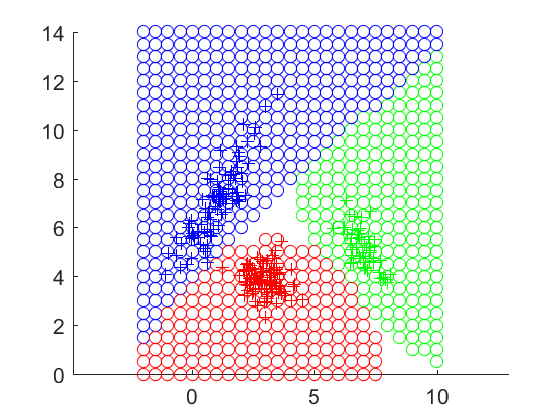

CVX Warning:
   Models involving "log_sum_exp" or other functions in the log, exp, and entropy
   family are solved using an experimental successive approximation method.
   This method is slower and less reliable than the method CVX employs for
   other models. Please see the section of the user's guide entitled
       <a href="file:///F:\cvx-w64\cvx\doc\advanced.html#the-successive-approximation-method">The successive approximation method</a>
   for more details about the approach, and for instructions on how to
   suppress this warning message in the future.


In [2]:
%% generate three simulated clusters
clear all
mu1 = [1 7];
SIGMA1 = 0.8*[1 1.5; 1.5 3];
X1 = mvnrnd(mu1,SIGMA1,100);

mu2 = [3 4];
SIGMA2 = 0.3*[1 0; 0 1];
X2 = mvnrnd(mu2,SIGMA2,100);

mu3 = [7 5];
SIGMA3 = 0.3*[1 -1;-1 2];
X3 = mvnrnd(mu3,SIGMA3,50);

figure(1);  clf;    hold on
plot(X1(:,1),X1(:,2),'b+')
plot(X2(:,1),X2(:,2),'r+')
plot(X3(:,1),X3(:,2),'g+'), hold off
axis equal

m = 250;
data = [X1; X2; X3];
data = [data ones(m,1)];
y1 = [ones(length([X1; X2]), 1); -ones(length(X3), 1)];
g = 1;

Z1 = [ones(m,1), sqrt(2)*data(:,1), sqrt(2)*data(:,2), ...
    data(:,1).^2, sqrt(2)*data(:,1).*data(:,2), data(:,2).^2];
clear w1
cvx_begin quiet
    variable w1(6,1)
    minimize (sum(log_sum_exp([zeros(1,m); (y1.*(Z1*w1))'])))
cvx_end


y2 = [ones(length(X1), 1); -ones(length([X2; X3]), 1)];

Z2 = [ones(m,1), sqrt(2)*data(:,1), sqrt(2)*data(:,2), ...
    data(:,1).^2, sqrt(2)*data(:,1).*data(:,2), data(:,2).^2];
clear w2
cvx_begin quiet
    variable w2(6,1)
    minimize (sum(log_sum_exp([zeros(1,m); (y2.*(Z2*w2))'])))
cvx_end



y3 = [-ones(length(X1), 1); ones(length(X2), 1); -ones(length(X3), 1)];
g = 1;

Z3 = [ones(m,1), sqrt(2)*data(:,1), sqrt(2)*data(:,2), ...
    data(:,1).^2, sqrt(2)*data(:,1).*data(:,2), data(:,2).^2];
clear w3
cvx_begin quiet
    variable w3(6,1)
    minimize (sum(log_sum_exp([zeros(1,m); (y3.*(Z3*w3))'])))
cvx_end



[X1g, X2g] = meshgrid(-2:0.5:10,0:0.5:14);
X_test = [X1g(:) X2g(:)];

m = length(X_test);

Z_test = [ones(m,1), sqrt(2)*X_test(:,1), sqrt(2)*X_test(:,2), ...
          X_test(:,1).^2, sqrt(2)*X_test(:,1).*X_test(:,2), X_test(:,2).^2];

y_hat1 = 1./(1 + exp(-Z_test*w1));
y_hat2 = 1./(1 + exp(-Z_test*w2));
y_hat3 = 1./(1 + exp(-Z_test*w3));

figure(1)
hold on
plot(X1(:,1),X1(:,2),'b+')
plot(X2(:,1),X2(:,2),'r+')
plot(X3(:,1),X3(:,2),'g+'),  
% plotting a decision boundary
B1 = [];
for i = 1:length(y_hat1)
    if abs(y_hat1(i)) > 0.2
        B1 = [B1; X_test(i,:)];         
    end    
end
B2 = [];
for i = 1:length(y_hat2)
    if abs(y_hat2(i)) < 0.2
        B2 = [B2; X_test(i,:)];         
    end    
end
B3 = [];
for i = 1:length(y_hat3)
    if abs(y_hat3(i)) < 0.2
        B3 = [B3; X_test(i,:)];         
    end    
end
figure(1)
hold on
plot(X1(:,1),X1(:,2),'b+')
plot(X2(:,1),X2(:,2),'r+')
plot(X3(:,1),X3(:,2),'g+'),  
plot(B1(:,1),B1(:,2),'go')
plot(B2(:,1),B2(:,2),'bo')
plot(B3(:,1),B3(:,2),'ro')
%%



# Problem 6

$X, Y = aX + b$, We know that two r.v.s are linear

$$\rho(X,Y) = 1 \quad a > 0$$

$$\rho(X,Y) = -1 \quad a < 0$$

$\rho$ indicates how linear

$$\begin{align*}
\rho = \frac{cov(X, Y)}{\sqrt{VAR(X)}\sqrt{VAR(Y)}} = \frac{E[(X-\bar X)(Y-\bar Y)]}{\sqrt{E[(X-\bar X)^2]}\sqrt{E[(Y-\bar Y)^2]}}
\end{align*}$$

$$
\begin{align*}
E[(X-\bar X)(aX-a\bar X)] & = a E[(X-\bar X)^2]\\
E[(Y - \bar Y)] &= E[a^2(X- \bar X)^2] = a^2E[(X-\bar X)^2]
\end{align*}
$$

# Problem 7

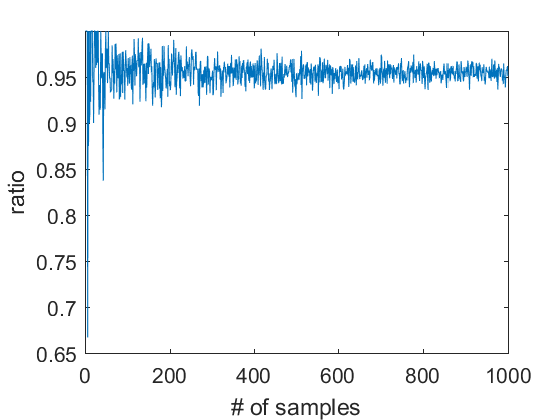

ans =

    0.9552


In [3]:
m = 1000;           % sample size
x = randn(1,m);     % standard normal ~ N(0,1^2)


R = [];
for i = 1:m
    clear x;
    x = randn(1,i);
    c = sum((x >= -2) & (x <= 2));
    R = [R c/i];
end

mean(R)

figure(1),  clf
plot(R)
xlabel('# of samples')
ylabel('ratio')